# ***Import Libraries and Loading data***

In [68]:
# Import libraries
import pandas as pd
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, fpgrowth, association_rules
import matplotlib.pyplot as plt
import seaborn as sns

# Set plotting style
sns.set_style("whitegrid")

# Read dataset
df = pd.read_csv('Datasets/Market_Basket_Optimisation.csv', header=None)

# ***Preproccessing***

In [69]:
# Convert DataFrame to a list of lists (transactions) (Apriori)
transactions_apr = []
for i in range(df.shape[0]):
    # Convert each row to a list of strings, dropping 'nan' values
    transactions_apr.append([str(df.values[i, j]) for j in range(df.shape[1]) 
                        if str(df.values[i, j]) != 'nan'])

print(f"Total number of transactions: {len(transactions_apr)}")
print(f"Example transaction: {transactions_apr[0][:5]}")

Total number of transactions: 7501
Example transaction: ['shrimp', 'almonds', 'avocado', 'vegetables mix', 'green grapes']


In [70]:
# Convert DataFrame to a List of Transactions (FP-Growth)
transactions_fpgrowth = []
for i in range(len(df)):
    # pd.notna checks if the value is not empty
    row = [str(df.values[i, j]) for j in range(len(df.columns)) if pd.notna(df.values[i, j])]
    if row:
        transactions_fpgrowth.append(row)

print(f"Total number of transactions: {len(transactions_apr)}")
print(f"Example transaction: {transactions_apr[0][:5]}")

Total number of transactions: 7501
Example transaction: ['shrimp', 'almonds', 'avocado', 'vegetables mix', 'green grapes']


In [71]:
# One-Hot Encoding (Binary Matrix)
te = TransactionEncoder()
te_ary_apr = te.fit(transactions_apr).transform(transactions_apr)
df_apr_onehot = pd.DataFrame(te_ary_apr, columns=te.columns_)

# Display results
df_apr_onehot.head()

,asparagus,almonds,antioxydant juice,asparagus,avocado,babies food,bacon,barbecue sauce,black tea,blueberries,...,turkey,vegetables mix,water spray,white wine,whole weat flour,whole wheat pasta,whole wheat rice,yams,yogurt cake,zucchini
0,False,True,True,False,True,False,False,False,False,False,...,False,True,False,False,True,False,False,True,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,True,False,False,False,False,False,...,True,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False


In [72]:
# One-Hot Encoding (Binary Matrix)
te = TransactionEncoder()
te_ary_fpgrowth = te.fit(transactions_fpgrowth).transform(transactions_fpgrowth)
df_fpgrowth_onehot = pd.DataFrame(te_ary_fpgrowth, columns=te.columns_)

# Display results
df_fpgrowth_onehot.head()

,asparagus,almonds,antioxydant juice,asparagus,avocado,babies food,bacon,barbecue sauce,black tea,blueberries,...,turkey,vegetables mix,water spray,white wine,whole weat flour,whole wheat pasta,whole wheat rice,yams,yogurt cake,zucchini
0,False,True,True,False,True,False,False,False,False,False,...,False,True,False,False,True,False,False,True,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,True,False,False,False,False,False,...,True,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False


# ***Modeling***

In [73]:
# Apply apriori
frequent_itemsets_apr = apriori(df_apr_onehot, min_support=0.01, use_colnames=True)

# Generate Association Rules
rules_apr = association_rules(frequent_itemsets_apr, metric="lift", min_threshold=1.0)

# Create a readable 'rule' string
rules_apr['rule'] = rules_apr['antecedents'].apply(lambda x: ', '.join(list(x))) + \
                        ' -> ' + rules_apr['consequents'].apply(lambda x: ', '.join(list(x)))

# Sort by Lift to find the strongest associations and select the top 10
top_10_rules_apr = rules_apr.sort_values(by='lift', ascending=False).head(10)

# Diplsay results
print("\nTop 10 Association Rules:")
print(top_10_rules_apr[['rule', 'support', 'confidence', 'lift']])


Top 10 Association Rules:
                                        rule   support  confidence      lift
214             herb & pepper -> ground beef  0.015998    0.323450  3.291994
215             ground beef -> herb & pepper  0.015998    0.162822  3.291994
385  ground beef -> mineral water, spaghetti  0.017064    0.173677  2.907928
384  mineral water, spaghetti -> ground beef  0.017064    0.285714  2.907928
397    olive oil -> mineral water, spaghetti  0.010265    0.155870  2.609786
396    mineral water, spaghetti -> olive oil  0.010265    0.171875  2.609786
193            tomatoes -> frozen vegetables  0.016131    0.235867  2.474464
192            frozen vegetables -> tomatoes  0.016131    0.169231  2.474464
189              shrimp -> frozen vegetables  0.016664    0.233209  2.446574
188              frozen vegetables -> shrimp  0.016664    0.174825  2.446574


In [74]:
# Apply FP-Growth
frequent_itemsets_fpgrowth = fpgrowth(df_fpgrowth_onehot, min_support=0.01, use_colnames=True)

# Generate Association Rules
rules_fpgrowth = association_rules(frequent_itemsets_fpgrowth, metric="lift", min_threshold=1.0)

# Create a readable 'rule' string
rules_fpgrowth['rule'] = rules_fpgrowth['antecedents'].apply(lambda x: ', '.join(list(x))) + \
                        ' -> ' + rules_fpgrowth['consequents'].apply(lambda x: ', '.join(list(x)))

# Sort by Lift to find the strongest associations and select the top 10
top_10_rules_fpgrowth = rules_fpgrowth.sort_values(by='lift', ascending=False).head(10)

# Diplsay results
print("\nTop 10 Association Rules:")
print(top_10_rules_fpgrowth[['rule', 'support', 'confidence', 'lift']])


Top 10 Association Rules:
                                        rule   support  confidence      lift
378             herb & pepper -> ground beef  0.015998    0.323450  3.291994
379             ground beef -> herb & pepper  0.015998    0.162822  3.291994
348  mineral water, spaghetti -> ground beef  0.017064    0.285714  2.907928
349  ground beef -> mineral water, spaghetti  0.017064    0.173677  2.907928
58     mineral water, spaghetti -> olive oil  0.010265    0.171875  2.609786
59     olive oil -> mineral water, spaghetti  0.010265    0.155870  2.609786
281            tomatoes -> frozen vegetables  0.016131    0.235867  2.474464
280            frozen vegetables -> tomatoes  0.016131    0.169231  2.474464
35               shrimp -> frozen vegetables  0.016664    0.233209  2.446574
34               frozen vegetables -> shrimp  0.016664    0.174825  2.446574


# ***Comparison***

C:\Users\dell\AppData\Local\Temp\ipykernel_21988\1391282004.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="lift", y="rule", data = top_10_rules_apr, palette="Reds_r", ax=ax1)
C:\Users\dell\AppData\Local\Temp\ipykernel_21988\1391282004.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="lift", y="rule", data = top_10_rules_fpgrowth, palette="Blues_r", ax=ax2)


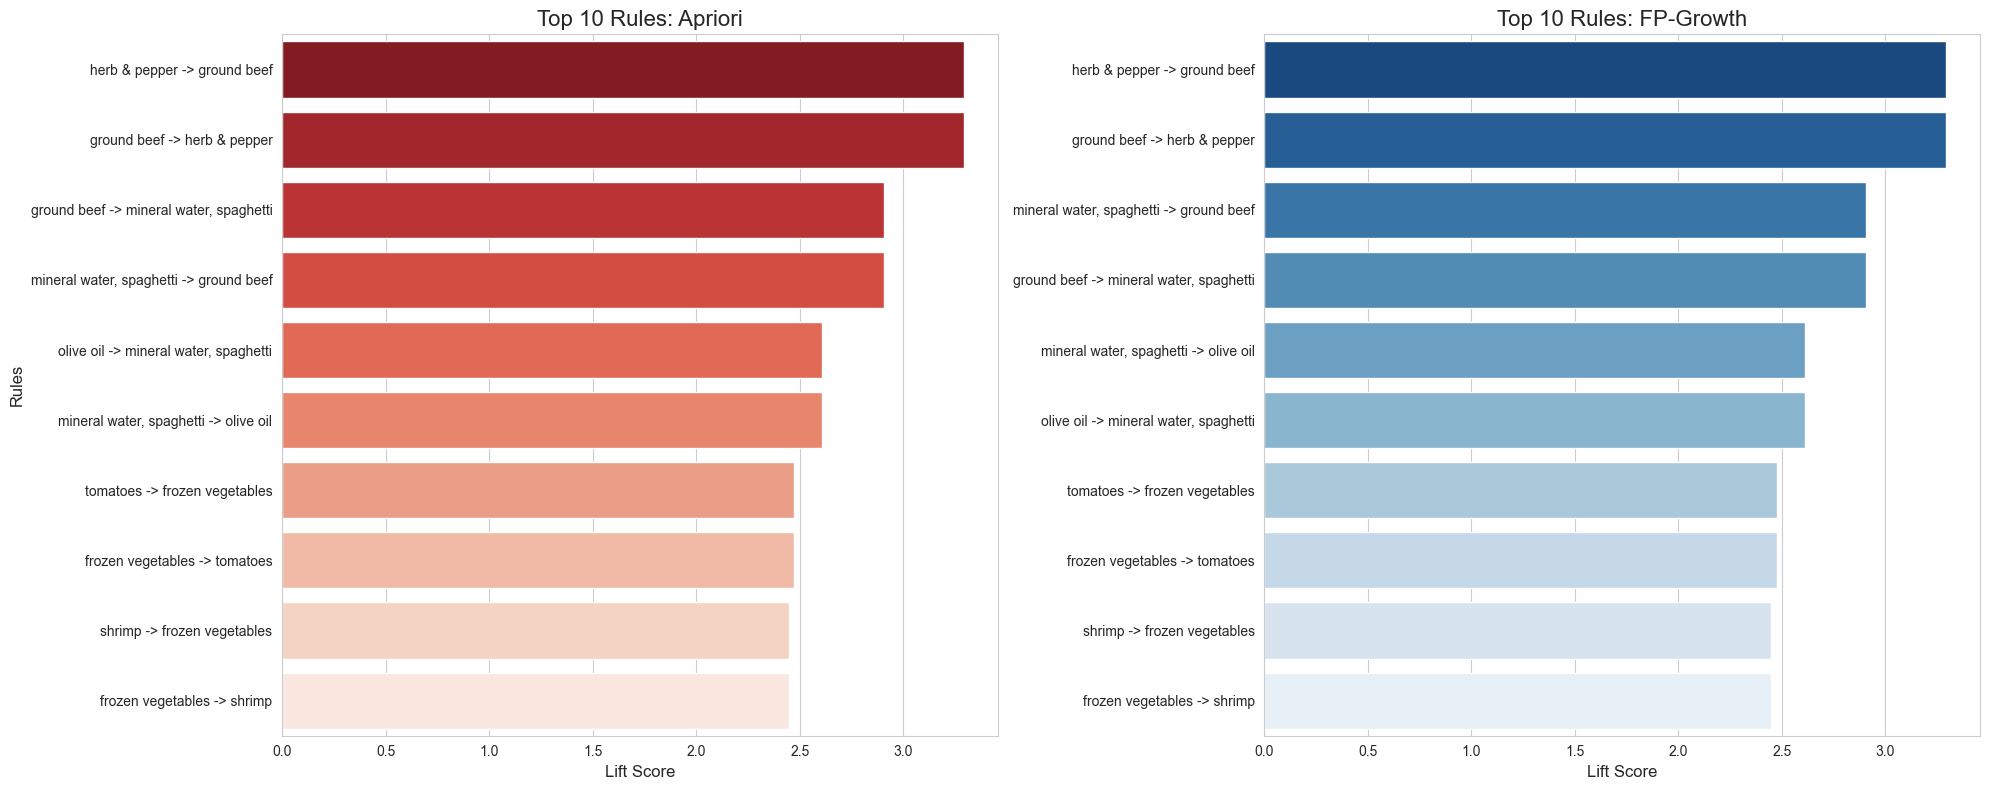

In [75]:
# Visualization Side-by-Side
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 8))

# Plot Apriori
sns.barplot(x="lift", y="rule", data = top_10_rules_apr, palette="Reds_r", ax=ax1)
ax1.set_title("Top 10 Rules: Apriori", fontsize=16)
ax1.set_xlabel("Lift Score", fontsize=12)
ax1.set_ylabel("Rules", fontsize=12)

# Plot FP-Growth
sns.barplot(x="lift", y="rule", data = top_10_rules_fpgrowth, palette="Blues_r", ax=ax2)
ax2.set_title("Top 10 Rules: FP-Growth", fontsize=16)
ax2.set_xlabel("Lift Score", fontsize=12)
ax2.set_ylabel("", fontsize=12) # Hide label for cleaner look

# Display result
plt.tight_layout()
plt.show()

C:\Users\dell\AppData\Local\Temp\ipykernel_21988\729396389.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='confidence', y='rule', data = df_apr, palette='Blues_d', ax=ax1)
C:\Users\dell\AppData\Local\Temp\ipykernel_21988\729396389.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='confidence', y='rule', data=df_fp, palette='GnBu_d', ax=ax2)


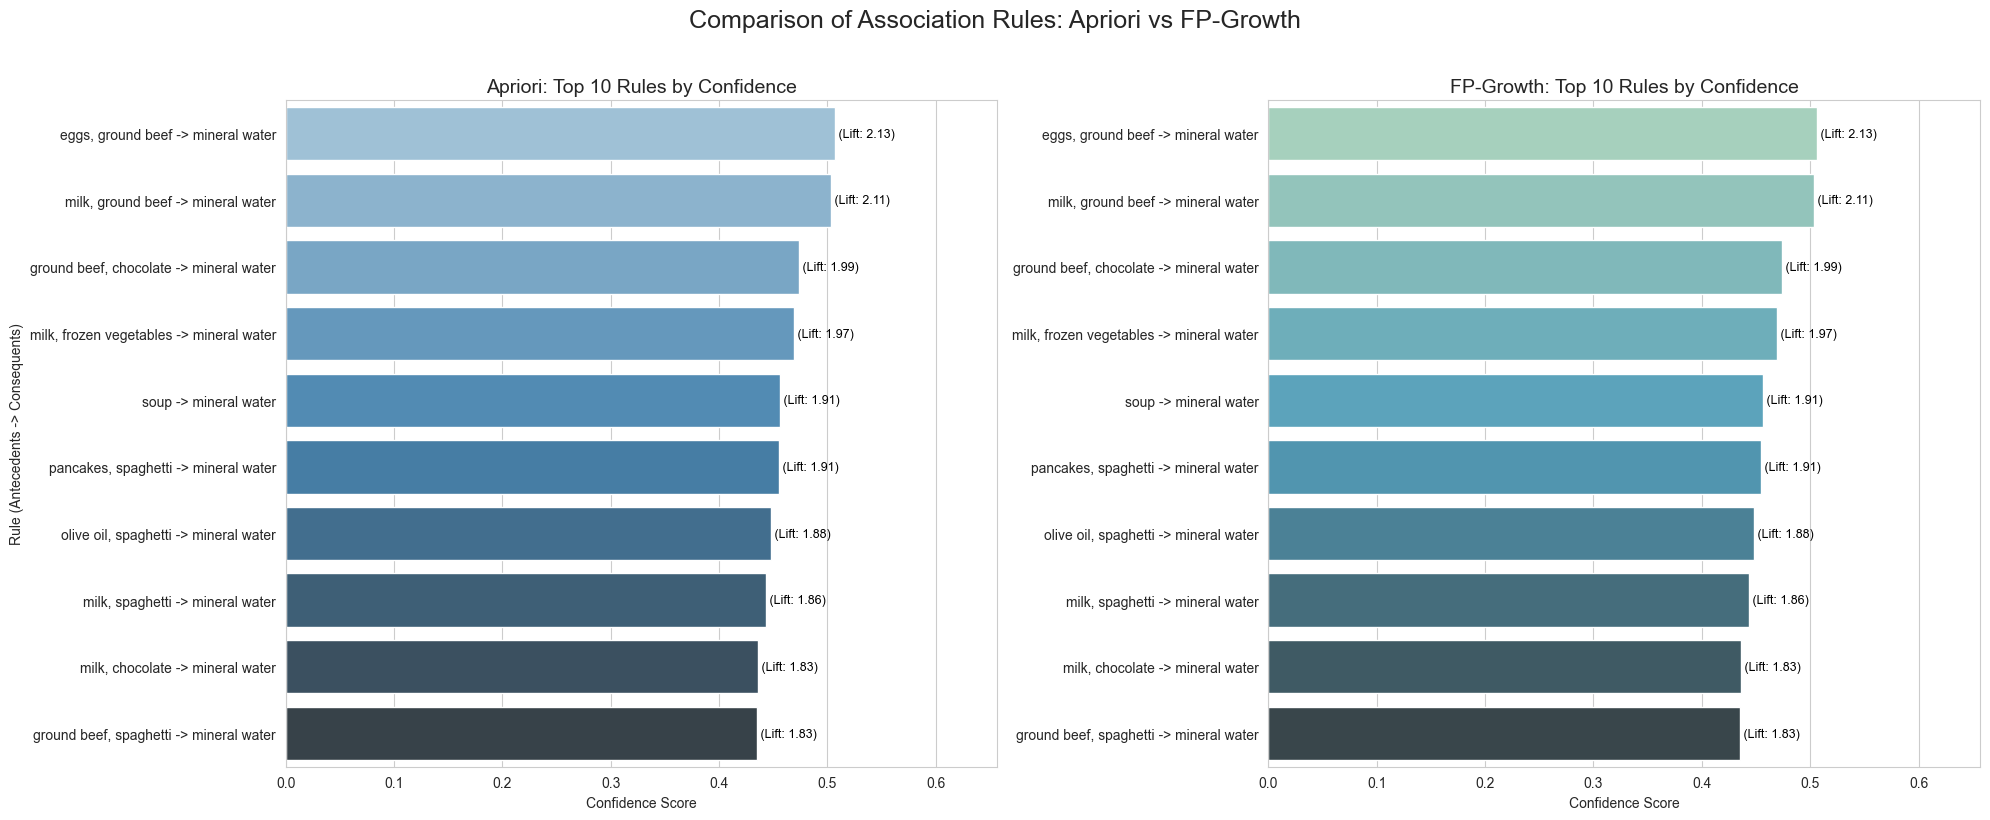

In [76]:
# Sort and display top 10 rules by Confidence
top_10_confidence_apr = rules_apr.sort_values(by='confidence', ascending=False).head(10)

# Sort and display top 10 rules by Confidence
top_10_confidence_fpgrowth = rules_fpgrowth.sort_values(by='confidence', ascending=False).head(10)

# Setup the figure with two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 8))

# --- PLOT 1: APRIORI ---
df_apr = top_10_confidence_apr.sort_values(by='confidence', ascending=False)
sns.barplot(x='confidence', y='rule', data = df_apr, palette='Blues_d', ax=ax1)

# Annotate Apriori Bars
for i, (conf, lift) in enumerate(zip(df_apr['confidence'], df_apr['lift'])):
    ax1.text(conf, i, f' (Lift: {lift:.2f})', color='black', ha='left', va='center', fontsize=9)

ax1.set_title('Apriori: Top 10 Rules by Confidence', fontsize=14)
ax1.set_xlabel('Confidence Score')
ax1.set_ylabel('Rule (Antecedents -> Consequents)')
ax1.set_xlim(0, df_apr['confidence'].max() + 0.15)

# --- PLOT 2: FP-GROWTH ---
df_fp = top_10_confidence_fpgrowth.sort_values(by='confidence', ascending=False)
sns.barplot(x='confidence', y='rule', data=df_fp, palette='GnBu_d', ax=ax2)

# Annotate FP-Growth Bars
for i, (conf, lift) in enumerate(zip(df_fp['confidence'], df_fp['lift'])):
    ax2.text(conf, i, f' (Lift: {lift:.2f})', color='black', ha='left', va='center', fontsize=9)

ax2.set_title('FP-Growth: Top 10 Rules by Confidence', fontsize=14)
ax2.set_xlabel('Confidence Score')
ax2.set_ylabel('') # Remove y-label for the second plot to save space
ax2.set_xlim(0, df_fp['confidence'].max() + 0.15)

# Final formatting
plt.suptitle('Comparison of Association Rules: Apriori vs FP-Growth', fontsize=18, y=1.02)
plt.tight_layout()
plt.show()

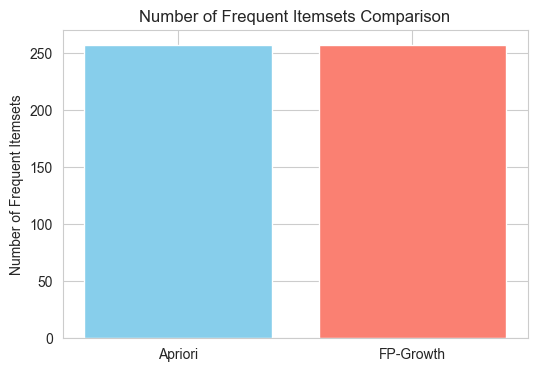

In [77]:
# Plot Number of Frequent Itemsets
plt.figure(figsize=(6,4))
plt.bar(['Apriori', 'FP-Growth'], [len(frequent_itemsets_apr), len(frequent_itemsets_fpgrowth)], color=['skyblue','salmon'])
plt.ylabel("Number of Frequent Itemsets")
plt.title("Number of Frequent Itemsets Comparison")
plt.show()

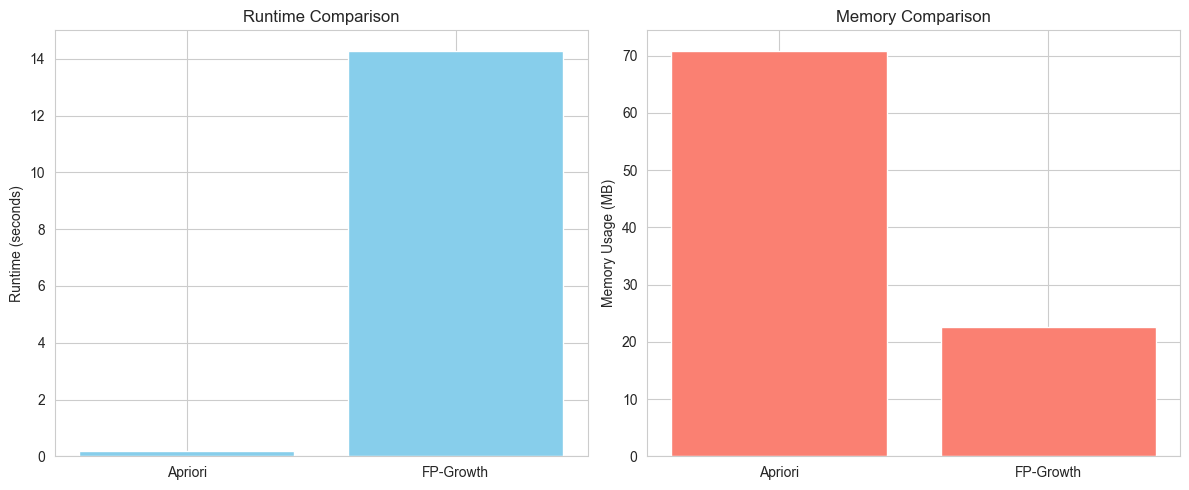

In [78]:
import time
import tracemalloc

# Function for compute time and memory
def measure_runtime_memory(df, algorithm, min_support=0.01):
    """Measure runtime and memory usage for Apriori or FP-Growth."""
    tracemalloc.start()
    start_time = time.time()
    
    if algorithm == 'apriori':
        _ = apriori(df, min_support=min_support, use_colnames=True)
    else:
        _ = fpgrowth(df, min_support=min_support, use_colnames=True)
    
    runtime = time.time() - start_time
    current, peak = tracemalloc.get_traced_memory()
    tracemalloc.stop()
    
    memory_usage = peak / 10**6  # Convert bytes to MB
    return runtime, memory_usage

# Measure runtime & memory
apriori_time, apriori_memory = measure_runtime_memory(df_apr_onehot, 'apriori')
fpgrowth_time, fpgrowth_memory = measure_runtime_memory(df_fpgrowth_onehot, 'fpgrowth')

# Labels and values
labels = ['Apriori', 'FP-Growth']
runtime_values = [apriori_time, fpgrowth_time]
memory_values = [apriori_memory, fpgrowth_memory]

# Plot side-by-side visuals
fig, axes = plt.subplots(1, 2, figsize=(12,5))

# Runtime visual
axes[0].bar(labels, runtime_values, color='skyblue')
axes[0].set_ylabel("Runtime (seconds)")
axes[0].set_title("Runtime Comparison")

# Memory visual
axes[1].bar(labels, memory_values, color='salmon')
axes[1].set_ylabel("Memory Usage (MB)")
axes[1].set_title("Memory Comparison")

# Display result
plt.tight_layout()
plt.show()

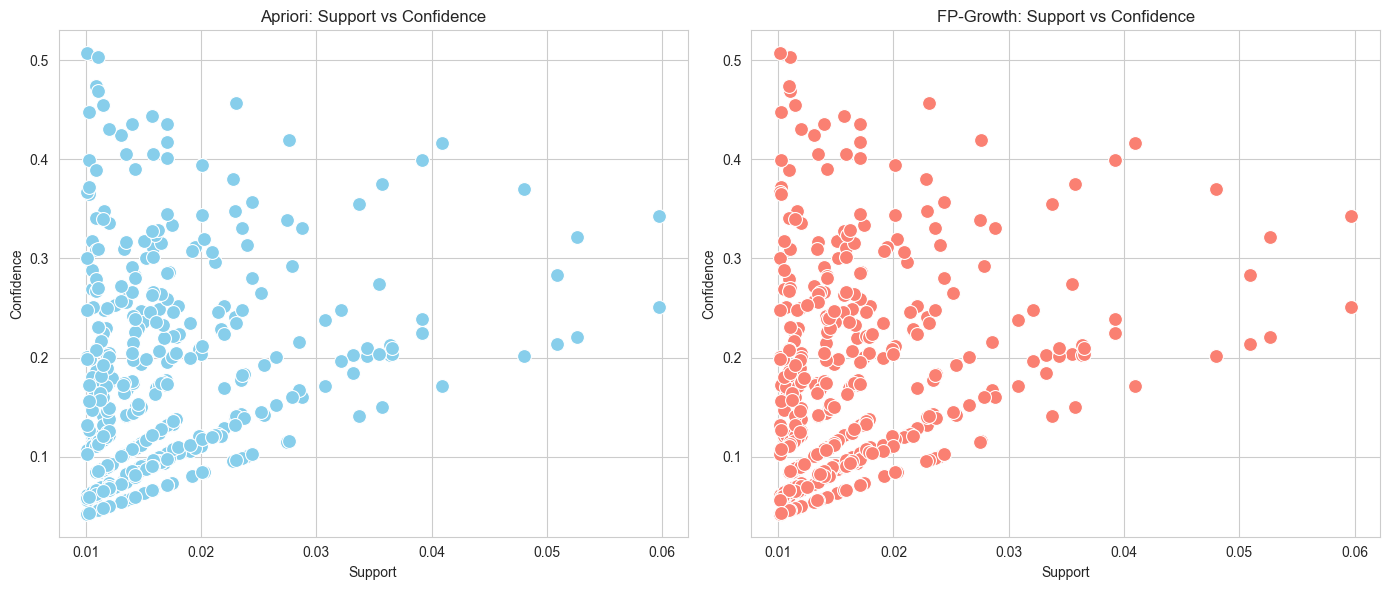

In [ ]:
# Plot side-by-side visuals
fig, axes = plt.subplots(1, 2, figsize=(14,6))

# Apriori scatter
sns.scatterplot(
    x=rules_apr['support'], 
    y=rules_apr['confidence'], 
    ax=axes[0],
    color='skyblue',
    s=100
)
axes[0].set_title("Apriori: Support vs Confidence")
axes[0].set_xlabel("Support")
axes[0].set_ylabel("Confidence")

# FP-Growth scatter
sns.scatterplot(
    x=rules_fpgrowth['support'], 
    y=rules_fpgrowth['confidence'], 
    ax=axes[1],
    color='salmon',
    s=100
)
axes[1].set_title("FP-Growth: Support vs Confidence")
axes[1].set_xlabel("Support")
axes[1].set_ylabel("Confidence")

# Display results
plt.tight_layout()
plt.show()


# ***Eclat Implementation***

In [1]:
import pandas as pd
import math

class EclatAlgorithm:
    def __init__(self, transactions, min_support=0.01):
        """
        Initialize the ECLAT algorithm.
        :param transactions: List of lists (transactions)
        :param min_support: Minimum support threshold (decimal)
        """
        self.transactions = transactions
        self.num_trans = len(transactions)
        self.min_support = min_support
        self.min_count = math.ceil(min_support * self.num_trans)
        self.tid_lists = self._build_tid_lists()
        self.frequent_itemsets = {}

    def _build_tid_lists(self):
        """Build the initial Vertical TID lists from horizontal transactions."""
        tid_lists = {}
        for tid, trans in enumerate(self.transactions):
            for item in trans:
                tid_lists.setdefault(item, set()).add(tid)
        return tid_lists

    def _recursive_eclat(self, prefix, items_tids):
        """Internal recursive function to perform the depth-first search."""
        for i in range(len(items_tids)):
            item, tids = items_tids[i]
            new_prefix = prefix + [item]
            
            # Store the found itemset and its support count
            self.frequent_itemsets[frozenset(new_prefix)] = len(tids)
            
            # Build suffix: Intersect current item's TIDs with subsequent items' TIDs
            suffix = []
            for j in range(i + 1, len(items_tids)):
                item2, tids2 = items_tids[j]
                intersection = tids & tids2
                
                if len(intersection) >= self.min_count:
                    suffix.append((item2, intersection))
            
            # If we found common transactions, go deeper
            if suffix:
                self._recursive_eclat(new_prefix, suffix)

    def fit(self):
        """Execute the ECLAT algorithm."""
        # 1. Filter single items that meet the min_count
        initial_items = [
            (item, tids) for item, tids in self.tid_lists.items() 
            if len(tids) >= self.min_count
        ]
        
        # 2. Sort by frequency (descending) for pruning efficiency
        initial_items = sorted(initial_items, key=lambda x: (-len(x[1]), x[0]))
        
        # 3. Start recursion
        self.frequent_itemsets = {}
        self._recursive_eclat([], initial_items)
        
        print(f"ECLAT successfully found {len(self.frequent_itemsets)} frequent itemsets.")
        return self

    def get_results_df(self):
        """Format the results into a sorted Pandas DataFrame."""
        if not self.frequent_itemsets:
            return pd.DataFrame()
            
        fi_rows = []
        for itset, count in self.frequent_itemsets.items():
            fi_rows.append({
                "itemset": set(itset),
                "support": count / self.num_trans,
                "count": count,
                "size": len(itset)
            })
            
        return pd.DataFrame(fi_rows).sort_values("support", ascending=False).reset_index(drop=True)

# --- Example Usage ---

# 1. Load your data
df = pd.read_csv('Datasets/Market_Basket_Optimisation.csv', header=None)
transactions = [
    [str(item) for item in row if pd.notna(item)] 
    for row in df.values
]

# 2. Initialize and Run
model = EclatAlgorithm(transactions, min_support=0.01)
model.fit()

# 3. Get results
results_df = model.get_results_df()
print("\nTop 10 Frequent Itemsets:")
print(results_df.head(10))

ECLAT successfully found 257 frequent itemsets.

Top 10 Frequent Itemsets:
               itemset   support  count  size
0      {mineral water}  0.238368   1788     1
1               {eggs}  0.179709   1348     1
2          {spaghetti}  0.174110   1306     1
3       {french fries}  0.170911   1282     1
4          {chocolate}  0.163845   1229     1
5          {green tea}  0.132116    991     1
6               {milk}  0.129583    972     1
7        {ground beef}  0.098254    737     1
8  {frozen vegetables}  0.095321    715     1
9           {pancakes}  0.095054    713     1
